In [8]:
import numpy as np
import pandas as pd

import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

from matplotlib import pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.gridspec as gridspec

plt.rcParams["font.family"] = "Times New Roman"
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors

pd.set_option("display.precision",2)

In [9]:
df = pd.read_excel("Dati CORE OM.xlsx")
df = df.rename(columns={"RIS (media)":"Risorse", "PRO (media)": "Problemi"})
df

,ID,Categoria,Età,Lavoro,Sex,RIS-G,RIS-T,RIS-OMN,PRO-G,PRO-T,PRO-OMN,Risorse,Problemi,Fasce età
0,Lecco 2,Infermiere,24,STRA,F,62,16,0,2,18,0,3.88,0.11,1
1,Meda 3,Infermiere,25,STRA,F,58,16,0,4,18,0,3.62,0.22,1
2,Pavia 2,Infermiere,25,STRA,F,57,16,0,5,18,1,3.56,0.29,1
3,Linate 2,Infermiere,25,STRA,F,42,16,0,10,18,0,2.62,0.56,1
4,Linate 7,Infermiere,26,SPE,M,63,16,0,0,18,0,3.94,0.00,1
5,Caponago 2,Infermiere,26,STRA,M,52,16,0,8,18,0,3.25,0.44,1
6,Linate 5,Medico,26,STRA,M,52,16,0,15,18,0,3.25,0.83,1
7,Linate 8,Infermiere,27,SPE,M,62,16,0,0,18,0,3.88,0.00,1
8,Caponago 1,Medico,28,STRA,M,61,16,0,2,18,0,3.81,0.11,1
9,Lecco 1,Medico,28,STRA,M,59,16,0,7,18,0,3.69,0.39,1


In [10]:
df[["Risorse","Problemi"]].describe()

,Risorse,Problemi
count,34.00,34.00
mean,3.44,0.30
std,0.43,0.28
min,2.12,0.00
25%,3.25,0.07
50%,3.56,0.22
75%,3.75,0.44
max,3.94,1.00


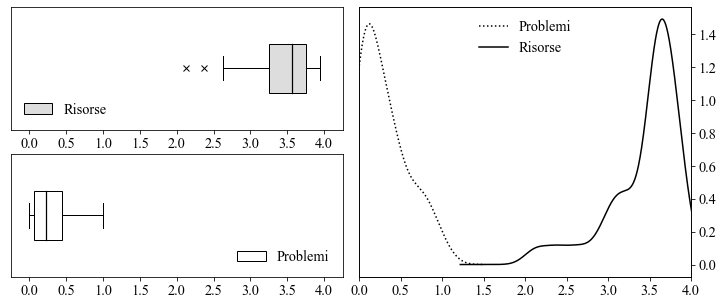

In [11]:
fig = plt.subplots(figsize=(10,5))

gs = gridspec.GridSpec(2, 2)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[:, 1])

flierprops = dict(marker='x', markersize=6, linestyle='none')
medianprops = dict(linestyle='-', linewidth=1.25, color='k')
boxprops = dict(linestyle='-',color='k', facecolor="#ddd")
boxprops2 = dict(linestyle='-',color='k', facecolor="#fff")


bp1 = ax1.boxplot(df["Risorse"], 
            meanline=True, widths=.4, patch_artist=True,
            flierprops=flierprops, medianprops=medianprops, boxprops=boxprops, vert=False)

bp2 = ax2.boxplot(df["Problemi"], 
            meanline=True, widths=.4, patch_artist=True,
            flierprops=flierprops, medianprops=medianprops, boxprops=boxprops2, vert=False)

df[["Problemi"]].plot.kde(ax=ax3, linestyle=":", bw_method=.5, color="k")
df[["Risorse"]].plot.kde(ax=ax3, linestyle="-", bw_method=.32, color="k")

ax1.set_xlim((-0.25,4.25))
ax2.set_xlim((-0.25,4.25))
ax1.xaxis.set_major_locator(mticker.MultipleLocator(.5))
ax1.yaxis.set_major_locator(mticker.NullLocator())
ax2.yaxis.set_major_locator(mticker.NullLocator())
ax2.xaxis.set_major_locator(mticker.MultipleLocator(.5))

ax3.set_xlim((0,4))
ax3.legend(frameon=False)
ax3.yaxis.set_major_locator(mticker.NullLocator())
ax3.xaxis.set_major_locator(mticker.MultipleLocator(.5))
ax3.set_ylabel("")
r3 = ax3.twinx()
r3.set_ylim(ax3.get_ylim())

ax1.legend([bp1["boxes"][0]], ['Risorse'], loc="lower left", frameon=False)
ax2.legend([bp2["boxes"][0]], ['Problemi'], loc="lower right", frameon=False)

# reduce horizontal space
fig[0].subplots_adjust(left=0.005, right=0.95, top=0.9, bottom=0.15, wspace=0.05)

# save
plt.savefig("../latex/figures/plot4.pdf")


In [12]:
X = df[["Problemi","Risorse"]].values
dbscan = DBSCAN(eps=.3, min_samples=3).fit(X)

In [13]:
core_samples_mask = np.zeros_like(dbscan.labels_, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
labels = dbscan.labels_
labels

array([ 0,  0,  0,  1,  0,  1,  1,  0,  0,  0, -1,  0,  1,  0,  0,  0,  1,
        0, -1,  1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  0,  0])

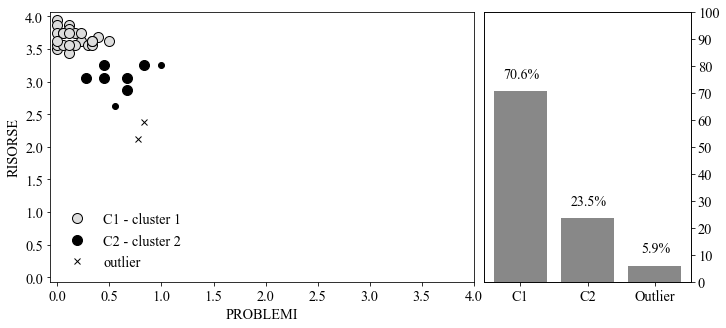

In [14]:
fig = plt.subplots(figsize=(10,5))

gs = gridspec.GridSpec(1, 3)
ax1 = plt.subplot(gs[0, :2])
ax2 = plt.subplot(gs[0, 2])

class_member_mask = (labels == 0)
xy = X[class_member_mask & core_samples_mask]

ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,
         marker="o", markerfacecolor="#ddd", markeredgecolor='k', markersize=10, alpha=1, label="C1 - cluster 1")

xy = X[class_member_mask & ~core_samples_mask]
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,
         marker="o", markerfacecolor="#ddd", markeredgecolor='k', markersize=6, alpha=1 )

class_member_mask = (labels == 1)

xy = X[class_member_mask & core_samples_mask]
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,
         marker="o", markerfacecolor="k", markeredgecolor='k', markersize=10, alpha=1, label="C2 - cluster 2")

xy = X[class_member_mask & ~core_samples_mask]
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,
         marker="o", markerfacecolor="k", markeredgecolor='k', markersize=6, alpha=1)

class_member_mask = (labels == -1)
xy = X[class_member_mask & ~core_samples_mask]
ax1.plot(xy[:, 0], xy[:, 1],linewidth=0,
         marker="x", markerfacecolor="#ddd", markeredgecolor='k', markersize=6, label="outlier" )

ax1.set_xlabel("PROBLEMI")
ax1.set_ylabel("RISORSE")
ax1.set_xlim((-0.07,4))
ax1.set_ylim((-0.07,4.07))
ax1.legend(loc="lower left", frameon=False)

c1 = X[labels==0].shape[0] / X.shape[0] *100
ax2.bar("C1",c1 , width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c1}%", (-0.25, c1+5), fontsize=14)

c2 = X[labels==1].shape[0] / X.shape[0] *100
ax2.bar("C2", c2, width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c2}%", (.75, c2+5), fontsize=14)

c3 = X[labels==-1].shape[0] / X.shape[0] *100
ax2.bar("Outlier", c3, width=0.8, color="#888")
ax2.annotate(f"{'%.1f' % c3}%", (1.8, c3+5), fontsize=14)

ax2.set_ylim((0,100))
ax2.yaxis.set_major_locator(mticker.NullLocator())
ax2.set_ylabel("")
r2 = ax2.twinx()
r2.set_ylim(ax2.get_ylim())
r2.yaxis.set_major_locator(mticker.MultipleLocator(10))


# reduce horizontal space
fig[0].subplots_adjust(left=0.06, right=0.95, top=0.9, bottom=0.15, wspace=0.05)


# save
plt.savefig("../latex/figures/plot5.pdf")
